In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

In [ ]:
df = pd.read_csv("/content/br_anatel_telefonia_movel_ddd.csv")

In [ ]:
df.dtypes

,0
ano,int64
mes,int64
sigla_uf,object
ddd,int64
tecnologia,object
sinal,object
acessos,int64


In [ ]:
df.head()

,ano,mes,sigla_uf,ddd,tecnologia,sinal,acessos
0,2009,2,AC,68,CDMA IS 95,2G,44429
1,2009,2,AC,68,CDMA2000,2G,540
2,2009,2,AC,68,Dados > 256kbps,3G,1639
3,2009,2,AC,68,Dados até 256kbps,2G,5966
4,2009,2,AC,68,GSM,2G,413600


# 1. Análise Descritiva

In [ ]:
print("\nResumo Estatístico:")
print(df["acessos"].describe())


Resumo Estatístico:
count    5.504300e+04
mean     6.449459e+05
std      1.592912e+06
min      1.000000e+00
25%      1.053450e+04
50%      9.481900e+04
75%      6.780860e+05
max      2.571837e+07
Name: acessos, dtype: float64


In [ ]:
print("\nTotal de Acessos por Tecnologia:")
print(df.groupby("tecnologia")["acessos"].sum())


Total de Acessos por Tecnologia:
tecnologia
AMPS                       72309
CDMA IS 95             219261900
CDMA2000                 2134496
Dados                   19781637
Dados > 256kbps        142281437
Dados Banda Larga      420794540
Dados até 256kbps       71007701
GSM                  15423127088
LTE                   8127764331
M2M                    171155476
M2M Especial           253354259
M2M Padrão             471372396
TDMA                     8148177
WCDMA                10169502092
Name: acessos, dtype: int64


In [ ]:
print("\nTotal de Acessos por Tipo de Sinal:")
print(df.groupby("sinal")["acessos"].sum())


Total de Acessos por Tipo de Sinal:
sinal
1G           72309
2G     15743460999
3G     10732578069
4G      8127764331
M2M      895882131
Name: acessos, dtype: int64


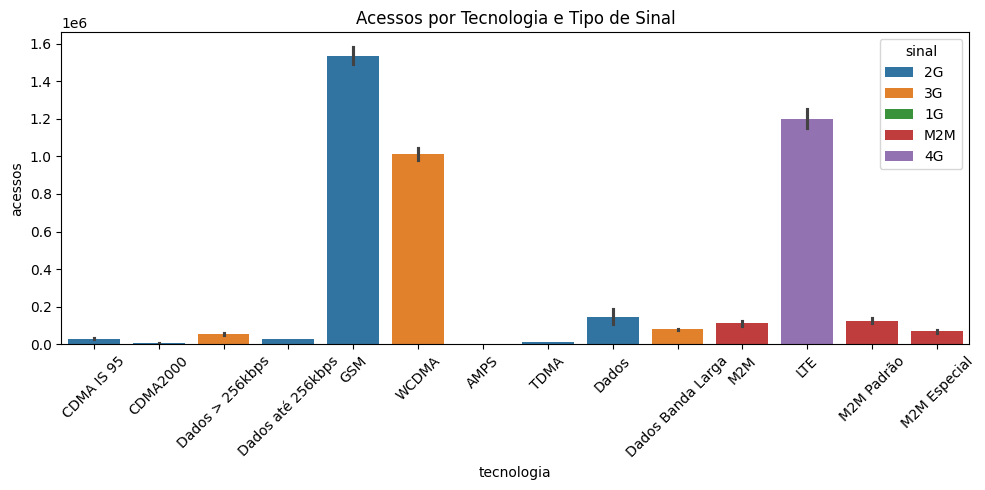

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x='tecnologia', y='acessos', hue='sinal')
plt.xticks(rotation=45)
plt.title('Acessos por Tecnologia e Tipo de Sinal')
plt.tight_layout()
plt.show()

# 2. Análise Inferencial

In [ ]:
# Separando os grupos 2G vs 3G
grupo_2g = df[df['sinal'] == '2G']['acessos']
grupo_3g = df[df['sinal'] == '3G']['acessos']

In [ ]:
# Teste de normalidade (Shapiro-Wilk)
print("\nTeste de Normalidade:")
print("2G:", stats.shapiro(grupo_2g))
print("3G:", stats.shapiro(grupo_3g))


Teste de Normalidade:
2G: ShapiroResult(statistic=np.float64(0.4211489913328279), pvalue=np.float64(1.0918028921336762e-121))
3G: ShapiroResult(statistic=np.float64(0.4072539254116636), pvalue=np.float64(8.428965585819882e-118))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21025.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17889.
  res = hypotest_fun_out(*samples, **kwds)


P-valor muito pequeno (< 0.05): Rejeitamos H₀ → os dados não são normalmente distribuídos. Isso quer dizer que os dados de acessos 2G e 3G não seguem uma distribuição normal.

In [ ]:
#podemos usar Mann-Whitney (teste não paramétrico)
teste = stats.mannwhitneyu(grupo_2g, grupo_3g, alternative='two-sided')
print("\nTeste Mann-Whitney U entre acessos 2G e 3G:")
print(teste)


Teste Mann-Whitney U entre acessos 2G e 3G:
MannwhitneyuResult(statistic=np.float64(160898836.0), pvalue=np.float64(1.5422923106412676e-133))


Como o p-valor é muito menor que 0.05, rejeitamos H₀.

Há diferença estatisticamente significativa entre o número de acessos 2G e 3G.

Em outras palavras: os acessos entre 2G e 3G não vêm da mesma distribuição – provavelmente, um dos grupos (2G) tem acessos muito maiores que o outro.

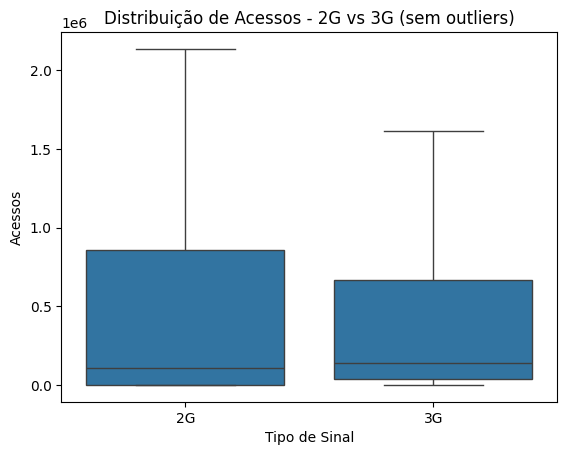

In [ ]:
sns.boxplot(
    data=df[df['sinal'].isin(['2G', '3G'])],
    x='sinal',
    y='acessos',
    showfliers=False
)
plt.title('Distribuição de Acessos - 2G vs 3G (sem outliers)')
plt.ylabel('Acessos')
plt.xlabel('Tipo de Sinal')
plt.show()

In [ ]:
# Separando os grupos 3G vs 4G
grupo3g = df[df['sinal'] == '3G']['acessos']
grupo4g = df[df['sinal'] == '4G']['acessos']

In [ ]:
# Teste de normalidade (Shapiro-Wilk)
print("\nTeste de Normalidade:")
print("3G:", stats.shapiro(grupo3g))
print("4G:", stats.shapiro(grupo4g))


Teste de Normalidade:
3G: ShapiroResult(statistic=np.float64(0.4072539254116636), pvalue=np.float64(8.428965585819882e-118))
4G: ShapiroResult(statistic=np.float64(0.4777875432504094), pvalue=np.float64(1.3966568412696498e-88))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17889.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6765.
  res = hypotest_fun_out(*samples, **kwds)


Ambos os grupos (3G e 4G) não seguem uma distribuição normal, já que seus p-valores são muito menores que 0.05.

Portanto, testes estatísticos paramétricos como o t-teste NÃO devem ser usados.



In [ ]:
from scipy.stats import mannwhitneyu
resultado = mannwhitneyu(grupo3g, grupo4g, alternative='two-sided')
print("Mann-Whitney U Result:", resultado)

Mann-Whitney U Result: MannwhitneyuResult(statistic=np.float64(44643748.0), pvalue=np.float64(3.64821452629872e-222))


Há diferença estatisticamente significativa entre os acessos das tecnologias 3G e 4G.

Ou seja, os usuários acessam as redes 3G e 4G de forma significativamente diferente (em volume de acessos).

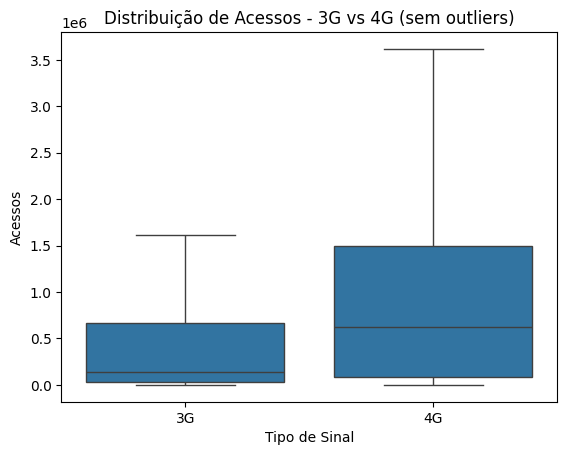

In [ ]:
sns.boxplot(
    data=df[df['sinal'].isin(['3G', '4G'])],
    x='sinal',
    y='acessos',
    showfliers=False  # <- isso remove os outliers do gráfico
)
plt.title('Distribuição de Acessos - 3G vs 4G (sem outliers)')
plt.ylabel('Acessos')
plt.xlabel('Tipo de Sinal')
plt.show()